In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

<a id="contents"></a>

## Notebook contents

- [**Loading the Data**](#intro)

- [**Infotable EDA**](#infotable)

- [**Coverpage EDA**](#coverpage)

<a id="intro"></a>

## Loading the Data

[Return to contents](#contents)


### Infotable Data

In [79]:
%matplotlib inline

if os.path.exists("infotable_dataset.csv"):
    infotable_dataset = pd.read_csv("infotable_dataset.csv")
else:
    file_paths = [
        'INFOTABLE_2023q4.tsv'
    ]

    dataframes = []

    for file_path in file_paths:
        year_quarter = file_path.split('_')[1].split('.')[0]
        year = int(year_quarter[:4])
        quarter = int(year_quarter[4:].replace("q", ""))
        df = pd.read_csv(file_path, delimiter='\t')
        df.rename(columns={'investor': 'ACCESSION_NUMBER'}, inplace=True)

        if quarter == 1:
            df['timestamp'] = pd.Timestamp(year, 1, 1)  # Q1: January 1st
        elif quarter == 2:
            df['timestamp'] = pd.Timestamp(year, 4, 1)  # Q2: April 1st
        elif quarter == 3:
            df['timestamp'] = pd.Timestamp(year, 7, 1)  # Q3: July 1st
        elif quarter == 4:
            df['timestamp'] = pd.Timestamp(year, 10, 1)  # Q4: October 1st

        dataframes.append(df)

    infotable_dataset = pd.concat(dataframes, ignore_index=True)

    infotable_dataset.to_csv("infotable_dataset.csv", index=False)

/var/folders/v2/5xt7prm10w1bkb7j4lrt_42m0000gn/T/ipykernel_6558/2096323691.py:16: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')


In [24]:
print(f"Infotable has {len(infotable_dataset)} rows.")


Infotable has 3278515 rows.


### Coverpage Data

In [122]:
if os.path.exists("coverpage_dataset.csv"):
    coverpage_dataset = pd.read_csv("coverpage_dataset.csv")
else:
    file_paths = [
        'COVERPAGE_2023q4.tsv'
    ]

    dataframes = []

    for file_path in file_paths:
        year_quarter = file_path.split('_')[1].split('.')[0]
        year = int(year_quarter[:4])
        quarter = int(year_quarter[4:].replace("q", ""))
        df = pd.read_csv(file_path, delimiter='\t')

        if quarter == 1:
            df['timestamp'] = pd.Timestamp(year, 1, 1)  # Q1: January 1st
        elif quarter == 2:
            df['timestamp'] = pd.Timestamp(year, 4, 1)  # Q2: April 1st
        elif quarter == 3:
            df['timestamp'] = pd.Timestamp(year, 7, 1)  # Q3: July 1st
        elif quarter == 4:
            df['timestamp'] = pd.Timestamp(year, 10, 1)  # Q4: October 1st

        dataframes.append(df)

    coverpage_dataset = pd.concat(dataframes, ignore_index=True)

    coverpage_dataset.to_csv("coverpage_dataset.csv", index=False)

In [123]:
print(f"Coverpage has {len(coverpage_dataset)} rows.")


Coverpage has 10117 rows.


<a id="infotable"></a>

## Infotable EDA

[Return to contents](#contents)

- [**Summary**](#summaryinfo)

- [**Missing Values**](#missingvalues)

- [**Heatmap**](#Heatmap)

- [**Value Column**](#value)

- [**Infotable Imbalance**](#imbalanceinfo)

- [**Frequency Analysis**](#frequency)

- [**Histograms of Numeric Columns**](#histograms)



<a id="summaryinfo"></a>

### Summary

In [103]:
infotable_dataset.shape

(3278515, 16)

We see that the shape of the dataset for INFOTABLE contains 3278515 rows and 16 columns. We can further observe the data types for INFOTABLE:

In [131]:
print("Data types of the columns:")
print(infotable_dataset.dtypes)

Data types of the columns:
ACCESSION_NUMBER                object
INFOTABLE_SK                     int64
NAMEOFISSUER                    object
TITLEOFCLASS                    object
CUSIP                           object
FIGI                            object
VALUE                            int64
SSHPRNAMT                        int64
SSHPRNAMTTYPE                   object
PUTCALL                         object
INVESTMENTDISCRETION            object
OTHERMANAGER                    object
VOTING_AUTH_SOLE                 int64
VOTING_AUTH_SHARED               int64
VOTING_AUTH_NONE                 int64
timestamp               datetime64[us]
dtype: object


Next, we look at the descriptive statistics for the numerical columns.

In [130]:
print("Descriptive statistics for numerical columns:")
print(infotable_dataset.describe())

Descriptive statistics for numerical columns:
       INFOTABLE_SK         VALUE     SSHPRNAMT  VOTING_AUTH_SOLE  \
count  3.278515e+06  3.278515e+06  3.278515e+06      3.278515e+06   
mean   1.035340e+08  1.789295e+07  2.946283e+05      2.208318e+05   
min    1.018926e+08  0.000000e+00  0.000000e+00      0.000000e+00   
25%    1.027144e+08  1.383600e+04  6.310000e+02      0.000000e+00   
50%    1.035340e+08  3.068430e+05  7.208000e+03      3.040000e+02   
75%    1.043537e+08  2.107060e+06  4.652700e+04      1.750000e+04   
max    1.051733e+08  5.453552e+11  4.197289e+10      4.197289e+10   
std    9.464430e+05  6.866326e+08  2.682088e+07      2.671712e+07   

       VOTING_AUTH_SHARED  VOTING_AUTH_NONE            timestamp  
count        3.278515e+06      3.278515e+06              3278515  
mean         2.144117e+04      6.022588e+04  2023-10-01 00:00:00  
min          0.000000e+00      0.000000e+00  2023-10-01 00:00:00  
25%          0.000000e+00      0.000000e+00  2023-10-01 00:00:00

We see that for the columns `VOTING_AUTH_SOLE`, `VOTING_AUTH_SHARED`, and `VOTING_AUTH_NONE` have many 0 values. These columns represent voting authority, which means that many entities do not hold

# TODO

Next, we look at the descriptive statistics for the categorical columns.

In [132]:
print("Descriptive statistics for categorical columns:")
print(infotable_dataset.describe(include=['object']))


Descriptive statistics for categorical columns:
            ACCESSION_NUMBER NAMEOFISSUER TITLEOFCLASS      CUSIP  \
count                3278515      3277716      3277505    3278515   
unique                  8125       137383        17383      38668   
top     0001086364-24-008417   ISHARES TR          COM  037833100   
freq                   48161       115603      1580355       9531   

                FIGI SSHPRNAMTTYPE PUTCALL INVESTMENTDISCRETION OTHERMANAGER  
count         260310       3278515  115797              3278515      1519535  
unique         16021             2       2                    3         3259  
top     BBG019PD35Z0            SH    Call                 SOLE            1  
freq            2288       3247099   59458              2003219       302930  


<a id="missingvalues"></a>

### Missing Values

In [107]:
print("Number of missing values in each column of the infotable:")
print(infotable_dataset.isna().sum())

Number of missing values in each column of the infotable:
ACCESSION_NUMBER              0
INFOTABLE_SK                  0
NAMEOFISSUER                799
TITLEOFCLASS               1010
CUSIP                         0
FIGI                    3018205
VALUE                         0
SSHPRNAMT                     0
SSHPRNAMTTYPE                 0
PUTCALL                 3162718
INVESTMENTDISCRETION          0
OTHERMANAGER            1758980
VOTING_AUTH_SOLE              0
VOTING_AUTH_SHARED            0
VOTING_AUTH_NONE              0
timestamp                     0
dtype: int64


The columns `NAMEOFISSUER`, `TITLEOFCLASS`, `FIGI`, `PUTCALL`, and `OTHERMANAGER` have missing values. However, this will not be an issue. Note that `NAMEOFISSUER`, `TITLEOFCLASS`, and `FIGI` can be used to identifier the specific security, but this is unnecessary because the securities can be uniquely identified using the `CUSIP`. 

The `PUTCALL` column has many missing values, but these are easily filled in. If the value is missing, we can assume that the security is neither a put nor a call, but instead owned outright.

`OTHERMANAGER` has missing values, but this is not an issue. This column is only used when the investment discretion is shared with another manager. If the value is missing, then the investment discretion is not shared. 

In [26]:
infotable_dataset['PUTCALL'] = infotable_dataset['PUTCALL'].fillna('N/A')
infotable_dataset['OTHERMANAGER'] = infotable_dataset['OTHERMANAGER'].fillna('N/A')

<a id="heatmap"></a>

### Heatmap of INFOTABLE numeric variables

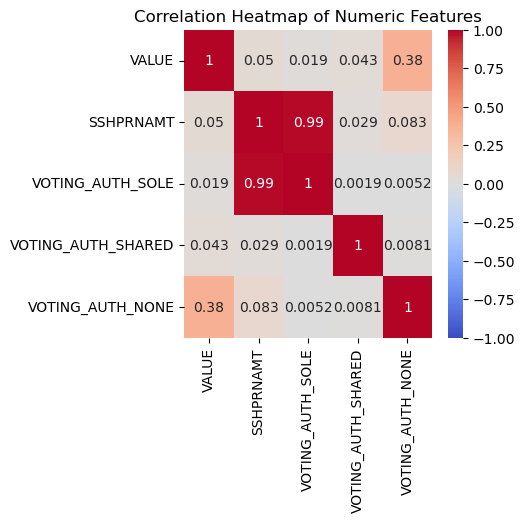

In [111]:
numeric_features = ['VALUE', 'SSHPRNAMT', 'VOTING_AUTH_SOLE', 'VOTING_AUTH_SHARED', 'VOTING_AUTH_NONE']

plt.figure(figsize=(4, 4))
sns.heatmap(infotable_dataset[numeric_features].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

By looking at this heatmap, we can see an obvious high positive correlation between the variables SSHPRNAMT and VOTING_AUTH_SOLE. This could cause multicollinearity in model building depending on the structure of the model, so we will take this into account during model building as there is obvious correlation between these variables.

The rest of the variables are not too highly correlated with each other.

<a id="value"></a>

### Value Column

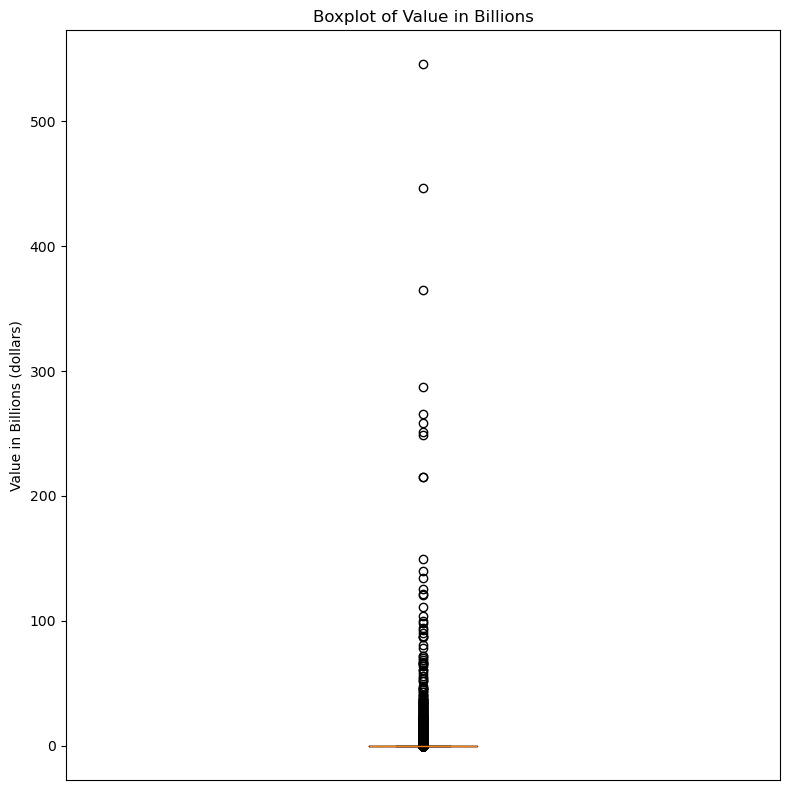

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.boxplot(infotable_dataset['VALUE']/1000000000)

plt.title('Boxplot of Value in Billions')
plt.ylabel('Value in Billions (dollars)')
plt.xticks([])

plt.tight_layout()
plt.show()

We can see in the boxplot that the distribution of value is heavily skewed with some extremely high values towards over 200 billion dollars.

Observing the statistics from the summary section, we first see that the distribution of value is pretty wide, as the standard deviation is 686 million and mean of about 1.7 billion dollars. For the `VALUE` column, we noted that there are many observations with 0's indicating 0 market value. It seems like these observations could provide some context as to the market value of certain stocks for companies and help identify trends for buying and selling behaviors.

We also note that there are several outliers for market value. Some observations have market values over 100 billion, major outliers compared to some of the rest of the companies. These are highly successful companies, such as Microsoft, Nvidia, Amazon, and Apple. We will use standardization to scale this variable to mitigate the influence of these larger companies and see how they compare with the rest of our data. This standardization process involves subtracting by the mean and dividing by the standard deviation, putting this variable on the same scale.



<a id="imbalanceinfo"></a>

### Infotable Imbalance

Here, we observe a bar plot of 3 key variables in INFOTABLE to observe any imbalance.

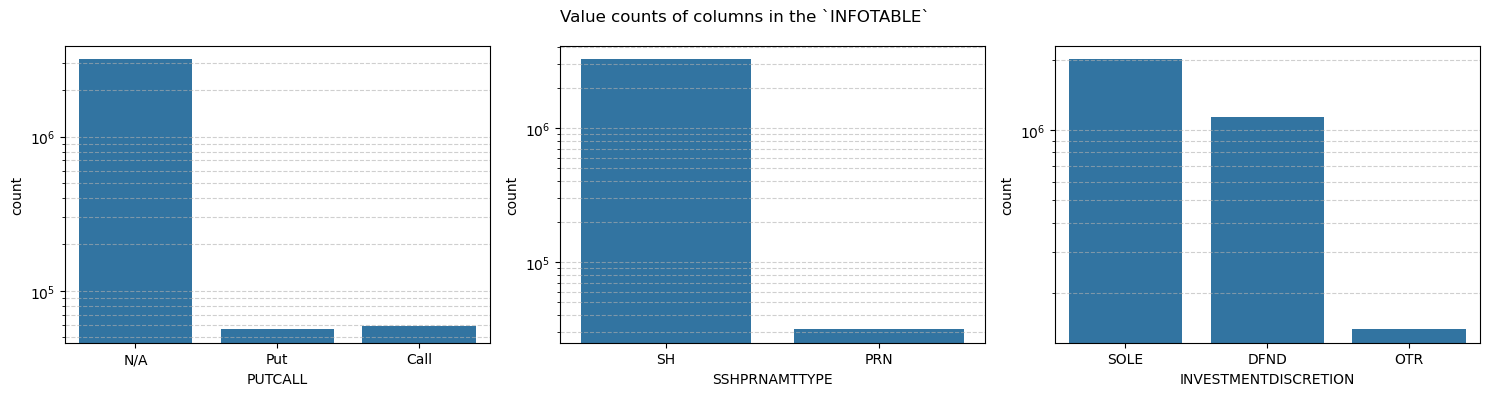

In [62]:
fig, ax = plt.subplots(1, 3,figsize=(15, 4))
sns.countplot(data=infotable_dataset, x='PUTCALL', ax=ax[0])
ax[0].set_yscale('log')
ax[0].grid(axis='y', linestyle='--', alpha=0.6, which='both')
#
sns.countplot(data=infotable_dataset, x='SSHPRNAMTTYPE', ax=ax[1])
ax[1].set_yscale('log')
ax[1].grid(axis='y', linestyle='--', alpha=0.6, which='both')
#
sns.countplot(data=infotable_dataset, x='INVESTMENTDISCRETION', ax=ax[2])
ax[2].set_yscale('log')
ax[2].grid(axis='y', linestyle='--', alpha=0.6, which='both')
#
plt.suptitle('Value counts of columns in the `INFOTABLE`')
plt.tight_layout()
plt.show()

As we can see in the bar plots, is major data imbalance within some of the categorical variables in our dataset, some classes have far fewer samples than others. We plan to use stratified cross-valudation to help ensure each fold of the training data will have the same distribution of classes as the entire dataset.


<a id="frequency"></a>

### Frequency Analysis

In this section, we observe the frequency of different values across the INFOTABLE dataset, plotting the value counts of these columns.

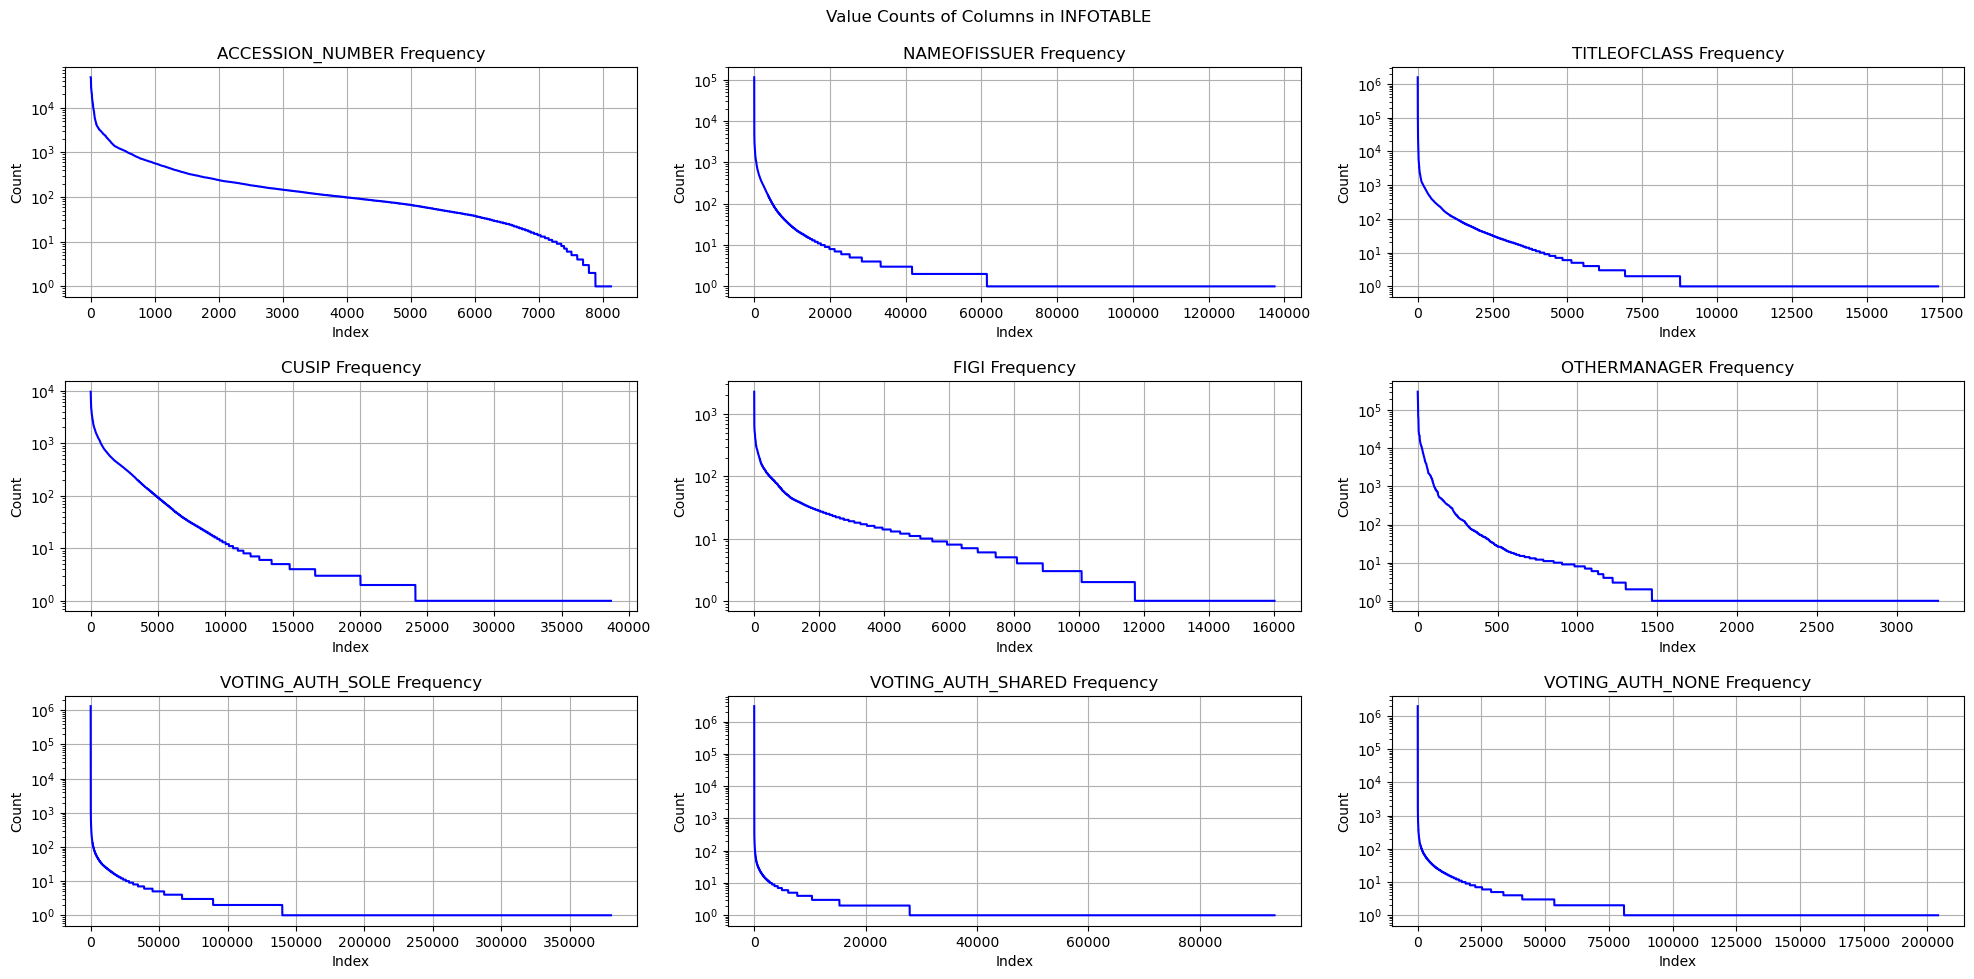

In [81]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))

ax[0,0].plot(infotable_dataset['ACCESSION_NUMBER'].value_counts().values, color='blue')
ax[0,0].set_yscale('log')
ax[0,0].set_title("ACCESSION_NUMBER Frequency")
ax[0,0].set_xlabel("Index")
ax[0,0].set_ylabel("Count")
ax[0,0].grid(True)

ax[0,1].plot(infotable_dataset['NAMEOFISSUER'].value_counts().values, color='blue')
ax[0,1].set_yscale('log')
ax[0,1].set_title("NAMEOFISSUER Frequency")
ax[0,1].set_xlabel("Index")
ax[0,1].set_ylabel("Count")
ax[0,1].grid(True)

ax[0,2].plot(infotable_dataset['TITLEOFCLASS'].value_counts().values, color='blue')
ax[0,2].set_yscale('log')
ax[0,2].set_title("TITLEOFCLASS Frequency")
ax[0,2].set_xlabel("Index")
ax[0,2].grid(True)
ax[0,2].set_ylabel("Count")

ax[1,0].plot(infotable_dataset['CUSIP'].value_counts().values, color='blue')
ax[1,0].set_yscale('log')
ax[1,0].set_title("CUSIP Frequency")
ax[1,0].set_xlabel("Index")
ax[1,0].set_ylabel("Count")
ax[1,0].grid(True)

ax[1,1].plot(infotable_dataset['FIGI'].value_counts().values, color='blue')
ax[1,1].set_yscale('log')
ax[1,1].set_title("FIGI Frequency")
ax[1,1].set_xlabel("Index")
ax[1,1].set_ylabel("Count")
ax[1,1].grid(True)

ax[1,2].plot(infotable_dataset['OTHERMANAGER'].value_counts().values, color='blue')
ax[1,2].set_yscale('log')
ax[1,2].set_title("OTHERMANAGER Frequency")
ax[1,2].set_xlabel("Index")
ax[1,2].set_ylabel("Count")
ax[1,2].grid(True)

ax[2,0].plot(infotable_dataset['VOTING_AUTH_SOLE'].value_counts().values, color='blue')
ax[2,0].set_yscale('log')
ax[2,0].set_title("VOTING_AUTH_SOLE Frequency")
ax[2,0].set_xlabel("Index")
ax[2,0].set_ylabel("Count")
ax[2,0].grid(True)

ax[2,1].plot(infotable_dataset['VOTING_AUTH_SHARED'].value_counts().values, color='blue')
ax[2,1].set_yscale('log')
ax[2,1].set_title("VOTING_AUTH_SHARED Frequency")
ax[2,1].set_xlabel("Index")
ax[2,1].set_ylabel("Count")
ax[2,1].grid(True)

ax[2,2].plot(infotable_dataset['VOTING_AUTH_NONE'].value_counts().values, color='blue')
ax[2,2].set_yscale('log')
ax[2,2].set_title("VOTING_AUTH_NONE Frequency")
ax[2,2].set_xlabel("Index")
ax[2,2].set_ylabel("Count")
ax[2,2].grid(True)

plt.suptitle("Value Counts of Columns in INFOTABLE")
plt.tight_layout(pad=1.5)
plt.show()

<a id="histograms"></a>


### Histograms of Numeric Columns

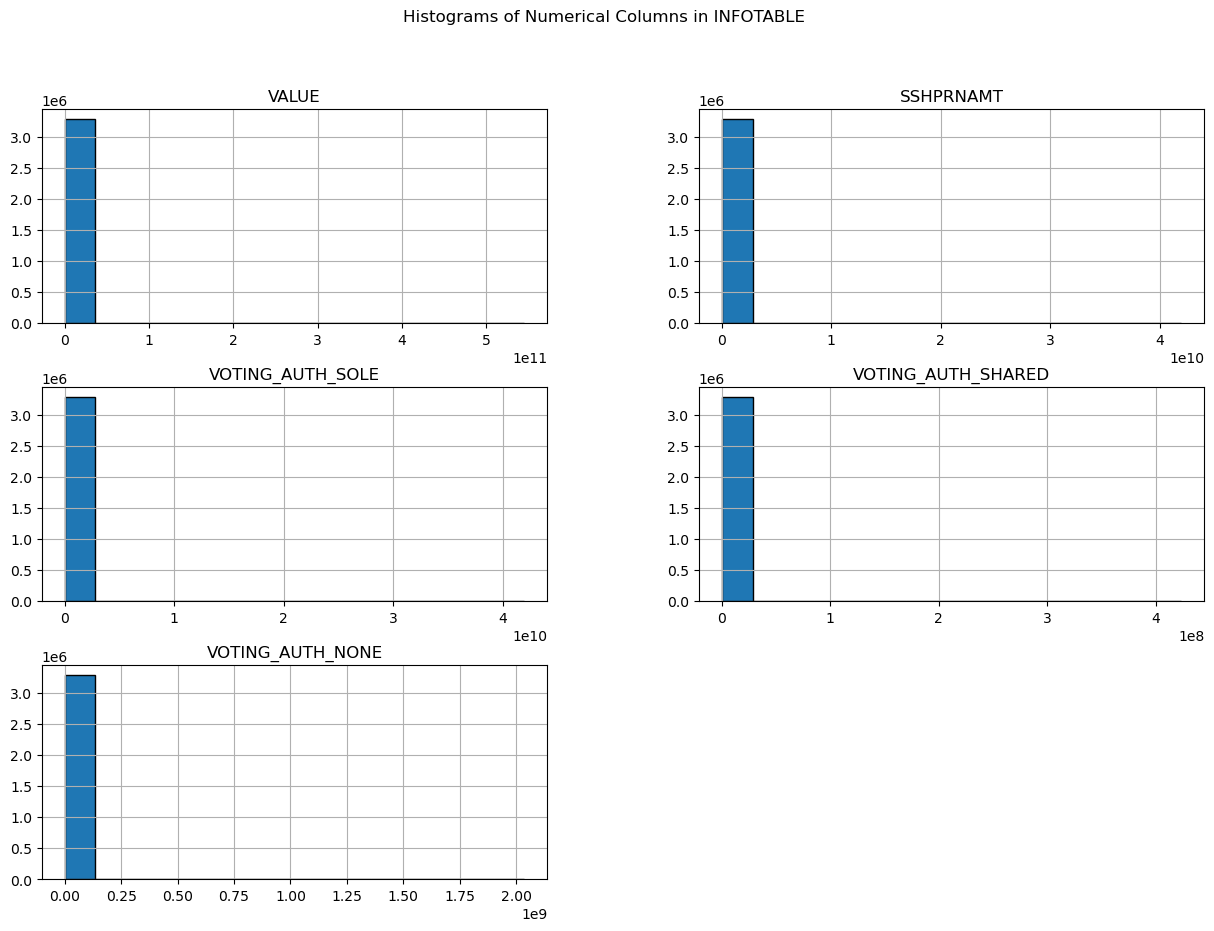

In [121]:
infotable_dataset[numeric_features].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle(f"Histograms of Numerical Columns in INFOTABLE")
plt.show()

We can see in the histograms the distributions are heavily skewed. Standardizing in this case will be essential.

<a id="coverpage"></a>

## Coverpage EDA

[Return to contents](#contents)

- [**Summary**](#summarycover)

- [**Missing Values**](#missingvaluescover)

- [**Heatmap**](#Heatmapcover)

<a id="summarycover"></a>

### Summary

In [135]:
print("Data types of the columns for Coverpage:")
print(coverpage_dataset.dtypes)

Data types of the columns for Coverpage:
ACCESSION_NUMBER                 object
REPORTCALENDARORQUARTER          object
ISAMENDMENT                      object
AMENDMENTNO                     float64
AMENDMENTTYPE                    object
CONFDENIEDEXPIRED                object
DATEDENIEDEXPIRED                object
DATEREPORTED                     object
REASONFORNONCONFIDENTIALITY      object
FILINGMANAGER_NAME               object
FILINGMANAGER_STREET1            object
FILINGMANAGER_STREET2            object
FILINGMANAGER_CITY               object
FILINGMANAGER_STATEORCOUNTRY     object
FILINGMANAGER_ZIPCODE            object
REPORTTYPE                       object
FORM13FFILENUMBER                object
CRDNUMBER                       float64
SECFILENUMBER                    object
PROVIDEINFOFORINSTRUCTION5       object
ADDITIONALINFORMATION            object
timestamp                        object
dtype: object


Next, the descriptive statistics of the numeric columns:

In [134]:
print("Descriptive statistics for numerical columns:")
print(coverpage_dataset.describe())

Descriptive statistics for numerical columns:
       AMENDMENTNO     CRDNUMBER
count   406.000000  4.408000e+03
mean      1.238916  4.272362e+05
std       1.665796  1.393088e+07
min       1.000000  0.000000e+00
25%       1.000000  1.193845e+05
50%       1.000000  1.574280e+05
75%       1.000000  2.878568e+05
max      27.000000  9.215079e+08


We see there are only 2 numeric features in this dataset.

Next, the categorical columns:

In [133]:
print("Descriptive statistics for categorical columns:")
print(coverpage_dataset.describe(include=['object']))

Descriptive statistics for categorical columns:
            ACCESSION_NUMBER REPORTCALENDARORQUARTER ISAMENDMENT  \
count                  10117                   10117        5415   
unique                 10117                      42           2   
top     0002035951-24-000001             30-JUN-2024           N   
freq                       1                    9100        5009   

       AMENDMENTTYPE CONFDENIEDEXPIRED DATEDENIEDEXPIRED DATEREPORTED  \
count            406               116                16           16   
unique             2                 2                 6            9   
top      RESTATEMENT                 N       14-AUG-2024  15-MAY-2024   
freq             233               100                 8            5   

           REASONFORNONCONFIDENTIALITY        FILINGMANAGER_NAME  \
count                               16                     10117   
unique                               1                      9018   
top     Confidential Treatment Expired  G